In [182]:
import sys
sys.path.append('..')
import ugent
import matplotlib.pyplot as plt
import numpy as np
from pyslise import Pyslise

In [183]:
V = lambda x: 1000*(x**3 - x**2)
left = (0, 1)
right = (0, 1)
p = Pyslise(V, 0, 1, tolerance=1e-8)
eigs = p.eigenpairsByIndex(0, 10, left, right)
eigs

[(0, -116.27576242785423, <pyslise.Eigenfunction at 0x7f17f2cde8f0>),
 (1, -54.196211867258015, <pyslise.Eigenfunction at 0x7f17f2cde4f0>),
 (2, 6.750490620075398, <pyslise.Eigenfunction at 0x7f17f2cde370>),
 (3, 76.56742151031929, <pyslise.Eigenfunction at 0x7f17f2cd9030>),
 (4, 164.76599199043315, <pyslise.Eigenfunction at 0x7f17f5404eb0>),
 (5, 272.94642318684885, <pyslise.Eigenfunction at 0x7f17f70b9870>),
 (6, 401.0142566861617, <pyslise.Eigenfunction at 0x7f17f32c4170>),
 (7, 548.8985895301095, <pyslise.Eigenfunction at 0x7f17f32c41b0>),
 (8, 716.5683695498788, <pyslise.Eigenfunction at 0x7f17f2e11630>),
 (9, 904.0073379690419, <pyslise.Eigenfunction at 0x7f17f2e11bf0>)]

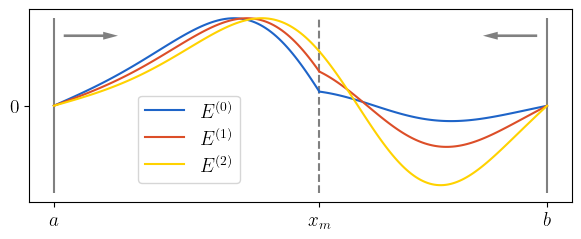

In [185]:
xm = p.__sector(p.__matchIndex).max
x_left = np.linspace(0, xm, 100)
x_right = np.linspace(xm, 1, 100)


fig, ax = plt.subplots(1, 1, figsize=(7, 2.5))

ax.set_xticks([0, xm, 1])
ax.set_xticklabels(['$a$', '$x_m$', '$b$'])
ax.set_yticks([0])
ax.vlines(xm, -1, 1, color="gray", ls='--')
ax.vlines(0, -1, 1, color="gray")
ax.vlines(1, -1, 1, color="gray")
ax.arrow(0.02, 0.8, 0.08, 0, width=0.03, head_length=0.03, ls='', color="gray")
ax.arrow(0.98, 0.8, -0.08, 0, width=0.03, head_length=0.03, ls='', color="gray")

for i, (E, col) in enumerate(zip([-35, -44, -54.196211867258015], [ugent.blauw, ugent.rood, ugent.geel])):
    y_left = np.array([p.propagate(E, left, (0,0), 0, x)[:2] for x in x_left])
    y_right = np.array([p.propagate(E, right, (0,0), 1, x)[:2] for x in x_right])
    y_left /= y_left[-1, 0, 0]
    y_right /= y_right[0, 0, 0]
    f = max(np.max(np.abs(y_left[:, 0, 0])), np.max(np.abs(y_right[:, 0, 0])))
    y_left /= f
    y_right /= f

    ax.plot(x_left, y_left[:, 0, 0], color=col, label=f"$E^{{({i})}}$")
    ax.plot(x_right, y_right[:, 0, 0], color=col)
ax.legend(loc=(0.2, .1))

plt.savefig("shooting_schematic.pdf", bbox_inches="tight")
plt.show()